# Beispiel 0: Erste Schritte mit Jupyter
In diesem Notebook werden kurz Jupyter und alle wichtigen Bibliotheken erklärt. 

Das Hier ist ein Jupyter-Notebook. Das ist eine Datei, in der man einzelen Stücke an Code (Zellen) nacheinander ausführen kann und darunter dann direkt den output sieht. Eine Zelle wird mit [SHIFT]+[ENTER] ausgeführt.
Klicke die darunter Liegende Zelle an und und führe sie aus. Der output sollte unter der Zelle erscheinen.


In [2]:
x = 5+1
print('Hello, World!', x)

Hello, World! 6


Wenn man etwas an der Zelle verändert, muss sie danach erneut ausgeführt werden, damit sich der Output aktualisiert. Ändere die Berechnung in Zeile 1 der oberen Zelle und führe erneut aus.
Der Output sollte jetzt eine andere Zahl anzeigen.  

In [4]:
# Rechnen mit Fehlerwerten
from uncertainties import ufloat as uf
from uncertainties.umath import *

var_a = uf(10, 5) # 10 +/- 5
var_b = uf(20, 3) # 20 +/- 3
print(var_a+var_b)

var_c = sqrt( log(var_a*var_b)**2 )
print(var_c)

# wenn man nur den Wert oder nur den Fehler möchte:
print(var_c.n)#wert
print(var_c.s) #fehler

30+/-6
5.3+/-0.5
5.298317366548036
0.5220153254455275


In [16]:
# Rechnen mit uArrays
from uncertainties.unumpy import uarray as ua

data_a = ua([1, 2, 3, 4, 5], 1)
data_b = ua([6, 2, 6, 8, 3], [0.1, 0.2, 0.3, 0.4, 0.5])

data_c = data_a*data_b

print(data_c)

[6.0+/-6.000833275470999 4.0+/-2.039607805437114 18.0+/-6.067124524847006
 32.0+/-8.158431221748456 15.0+/-3.905124837953327]


In [17]:
# Auf Werte/Fehler von uArrays zugreifen
from jupyterpc import *

print('Werte: ', num(data_a))
print('Fehler: ', sig(data_a))

# Auf einzelne Elemente des arrays zugreifen
print('Einzelner Wert: ', data_a[1])



Werte:  [ 1.  2.  3.  4.  5.]
Fehler:  [ 1.  1.  1.  1.  1.]
Einzelner Wert:  2.0+/-1.0


<IPython.core.display.Javascript object>


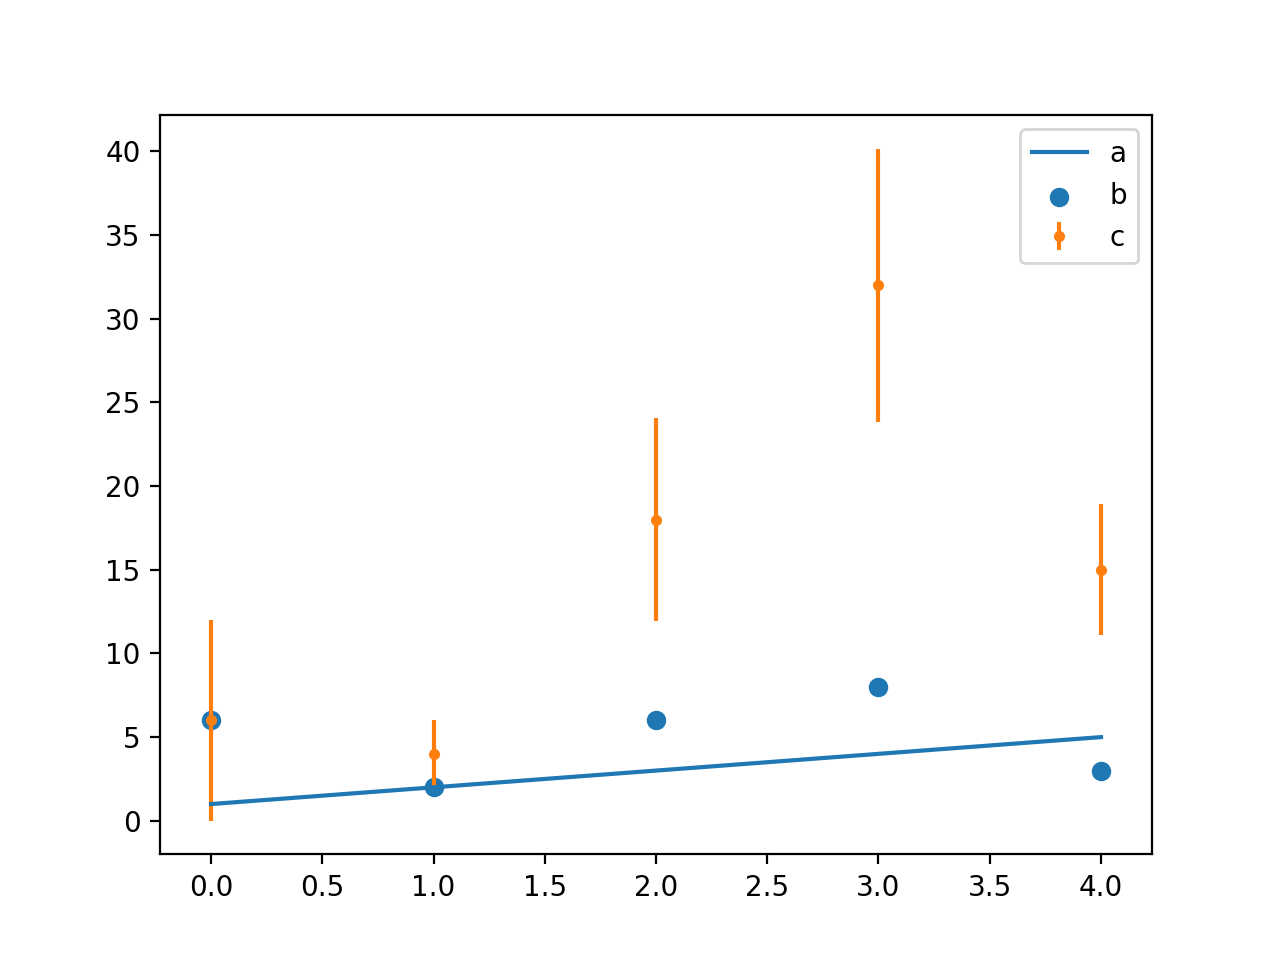

In [26]:
# darstellen als Graph
import matplotlib.pyplot as plt
%matplotlib notebook

data_x = range(5) # Gibt liste [0, 1, ... , n-1] zurück

plt.figure()

plt.plot(data_x, num(data_a), label='a')

plt.scatter(data_x, num(data_b), label='b')

uplot(data_x, data_c, label='c', marker = '.') # Zeigt fehlerwerte mit an

plt.plot()

plt.legend()

plt.show()

In [27]:
# Darstellen als Tabelle
print(table('willkürliche werte', {'spalte a':data_a, 'spalte b':data_b}))


            \begin{table}
                \caption{willkürliche werte}
                \centering
                \begin{tabular}{l|l}
            		spalte a & spalte b \\
			$1.0 \pm 1.0$ & $6.00 \pm 0.10$ \\
			$2.0 \pm 1.0$ & $2.00 \pm 0.20$ \\
			$3.0 \pm 1.0$ & $6.00 \pm 0.30$ \\
			$4.0 \pm 1.0$ & $8.0 \pm 0.4$ \\
			$5.0 \pm 1.0$ & $3.0 \pm 0.5$ \\

                \end{tabular}
            \end{table}
          


11.6+/-0.9 -14+/-5


<IPython.core.display.Javascript object>


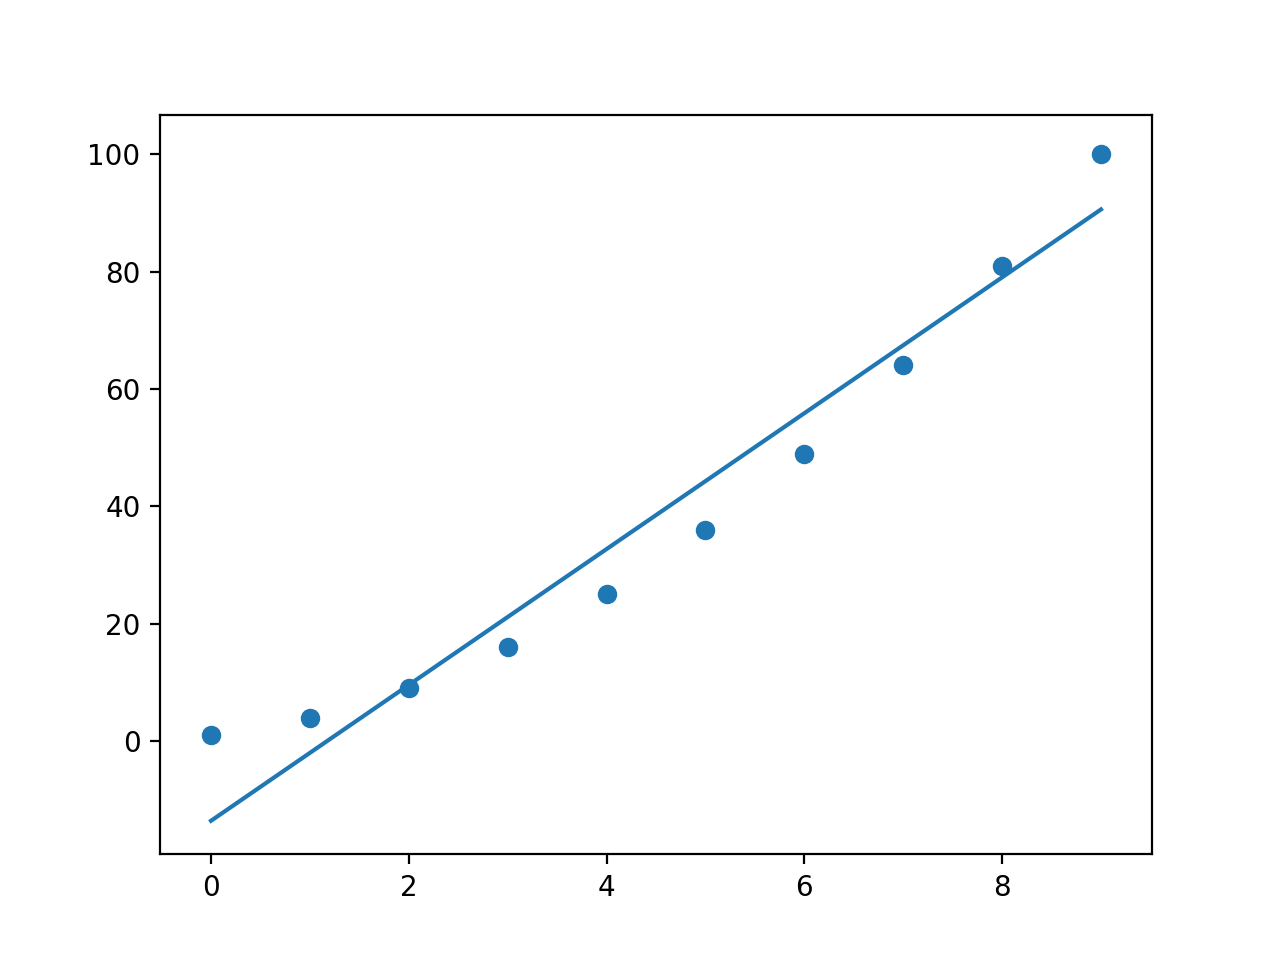

In [19]:
# Linearer fit
data_
m, b = fit(data_x, data_b)
print(m, b)
plt.figure()
plt.plot(data_x, [m.n*x+b.n for x in data_x])
plt.scatter(data_x, data_b)
plt.show()